# Semantic Function Species

In [1]:
from scripts.imports import *

out = Exporter(
    paths['outdir'], 
    'semantics'
)

In [2]:
df.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'head_utf8',
       'funct_type', 'function', 'quality', 'name', 'text', 'n_times',
       'lex_token', 'is_advb', 'tense', 'firstw', 'genre', 'domain', 'gendom',
       'clause', 'sentence', 'cl_rela', 'cl_type', 'cl_kind', 'verb',
       'verb_etcbc', 'verb_utf8', 'verb_text', 'verbform', 'verb_stem',
       'cl_args', 'has_objc', 'has_cmpl', 'has_subj', 'has_oc',
       'Time Position', 'cl_type2', 'cl_nsuccs', 'cl_clust50', 'cl_clust10',
       'verbtense', 'vt_order', 'PP', 'unmodified', 'modtag', 'modtag2',
       'front', 'ph_type', 'has_time', 'main_genre', 'APPO', 'DEF', 'ORDN',
       'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON', 'demon_type',
       'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1', 'SFX2', 'ADVB',
       'CARDC'],
      dtype='object')

In [3]:
df.shape

(3648, 76)

# ! TODO ! : Clean these up!

* Check on KL HJWM and equivalents; Haspelmath suggests that 'every' be rendered as equivalent to "[in] every February"; I have tagged these as habituals; i.e. habital simultaneous—maybe that is right. But I should be sure. Also, where might KL indicate a duration instead?
* מתי look at this ehad with simul L; prob remove it
* todo: remove 472789 as this is emotive, not a location
* disambig one case of `atelic_ext, simultaneous` which shouldn't be there
* disambig one case of `habitual, multi_simul`
* change name of anterior_dist to dist_past + anterior
* change name of distfut_ext to dist_fut + atelic_ext

In [4]:
ALL_funct_cts = df.function.value_counts()

ALL_funct_cts

simultaneous                                 1947
atelic_ext                                    576
anterior_dur                                  434
posterior                                     225
posterior_dur                                  66
habitual                                       62
begin_to_end                                   55
purposive_ext                                  34
simultaneous + atelic_ext                      24
anterior_dur_past?                             21
regular_recurrence                             18
anterior                                       18
multi_simuls                                   18
anterior_dur_purposive                         15
telic_ext                                      14
begin_to_end_habitual                           6
dist_posterior                                  6
dist_fut                                        6
simul_to_end                                    6
habitual?                                       6


In [5]:
out.number(
    ALL_funct_cts.shape[0],
    'ALL_funct_unique',
)

'73'

In [6]:
out.text(
    '; '.join(ALL_funct_cts.index).replace('_', '\_'),
    'ALL_funct_tags',
)

'simultaneous; atelic\\_ext; anterior\\_dur; posterior; posterior\\_dur; habitual; begin\\_to\\_end; purposive\\_ext; simultaneous + atelic\\_ext; anterior\\_dur\\_past?; regular\\_recurrence; anterior; multi\\_simuls; anterior\\_dur\\_purposive; telic\\_ext; begin\\_to\\_end\\_habitual; dist\\_posterior; dist\\_fut; simul\\_to\\_end; habitual?; atelic\\_ext?; anterior\\_limitive; dur\\_to\\_end; multi\\_antdur; atelic\\_ext + simultaneous; anterior\\_limitive?; posterior + atelic\\_ext; regular\\_recurrence?; posterior\\_simul; dist\\_prospective; dist\\_past; anterior\\_dur + duration; purposive\\_ext?; purposive; multi\\_posterior\\_dur; purposive?; habitual + begin\\_to\\_end; dist\\_fut?; anterior + posterior; perdurative?; simul\\_posts; simul\\_posterior; anterior\\_ext; simultaneous + posterior; telic\\_ext?; simultaneous + dist\\_posterior; posterior\\_dur + begin\\_to\\_end + atelic\\_ext; simultaneous + multi\\_begin\\_to\\_end; posterior, posterior\\_dur; posterior\\_dur?; 

In [7]:
out.number(
    ALL_funct_cts['dist_posterior'],
    'N_dist_posterior'
)

'6'

In [8]:
df[df.function == 'dist_posterior']['verse']

node
457809    1_Samuel 30:12
463357      1_Kings 15:5
474066     Jeremiah 2:32
492838      Psalms 55:20
493817       Psalms 74:2
505558       Esther 4:11
Name: verse, dtype: object

In [60]:
ts.show(
    df[df.function=='posterior_dist']
, extra=['function'])

showing 1 of 1


,verse,clause,function
node,,,
428448,Genesis 11:10,וַיֹּ֖ולֶד אֶת־אַרְפַּכְשָׁ֑ד שְׁנָתַ֖יִם אַחַ֥ר הַמַּבּֽוּל׃,posterior_dist


In [65]:
ts.show(
    df[df.function=='anterior_dur_except']
, extra=['function'])

showing 1 of 1


,verse,clause,function
node,,,
429462,Genesis 21:26,וְגַ֧ם אָנֹכִ֛י לֹ֥א שָׁמַ֖עְתִּי בִּלְתִּ֥י הַיֹּֽום׃,anterior_dur_except


## Count Function Types

In [10]:
functype_ct = df.funct_type.value_counts()
functype_pr = functype_ct / functype_ct.sum()
functype_cp = join_ct_pr(functype_ct, functype_pr)

out.table(
    functype_cp,
    'ALL_functype_cp',
    caption='Function Type Counts',
)

,count,percent
main,3351,92%
compound,150,4%
secondary,94,3%
ambiguous,53,1%


## Main Function Analysis

In [11]:
df_main = df[df.funct_type=='main']

out.number(
    df_main.shape[0],
    'total_main_fc'
)

'3,351'

In [12]:
# get a freq count
funct_ct = df_main.function.value_counts(ascending=False)
funct_pr = (funct_ct / funct_ct.sum())
funct_pr_str = (funct_pr.round(2) * 100).astype(int).astype(str) + '%'
funct_vals = pd.concat([funct_ct, funct_pr_str], 1).T\
    .set_axis(['freq.', 'perc.'], 0)\

out.table(
    funct_vals,
    'funct_counts',
    caption='Frequencies of Primary Time Functions',
    adjustbox=True,
)

funct_vals

,simultaneous,atelic_ext,anterior_dur,posterior,posterior_dur,habitual,anterior,telic_ext,dist_fut,dist_past
freq.,1947,576,434,225,66,62,18,14,6,3
perc.,57%,17%,13%,7%,2%,2%,1%,0%,0%,0%


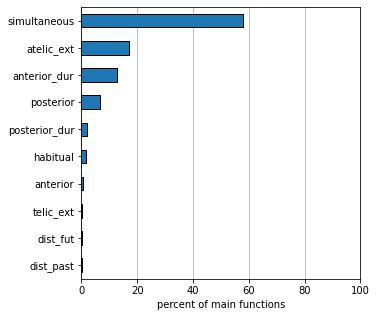

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
funct_pr.sort_values().mul(100).plot(kind='barh', ax=ax, edgecolor='black')
ax.set_xlabel('percent of main functions')
ax.grid(axis='x')
ax.set_axisbelow(True)
ax.set_xlim(0, 100)
out.plot(
    'bar_funct_perc',
)

In [14]:
top4_perc = 100*funct_pr.loc['simultaneous':'posterior'].sum()
out.number(
    top4_perc,
    'top4_perc',
)

top4_perc

94.95672933452701

In [15]:
# export numbers for each main
for funct in funct_vals.columns:
    Nfunct = funct_vals[funct]['freq.']
    Pfunct = funct_vals[funct]['perc.'].replace('%', '')
    out.number(Nfunct, f'N_{funct}')
    out.text(Pfunct, f'P_{funct}')

## All Functions Phrase Type

In [16]:
allf_pht_ct = df.ph_type.value_counts()
allf_pht_pr = allf_pht_ct / allf_pht_ct.sum()
allf_pht_cp = join_ct_pr(allf_pht_ct, allf_pht_pr)

out.table(
    allf_pht_cp,
    'allf_pht_cp',
    caption='Phrase Type Counts for All Functions',
)

,count,percent
PP,2190,60%
NP,913,25%
ADVB,545,15%


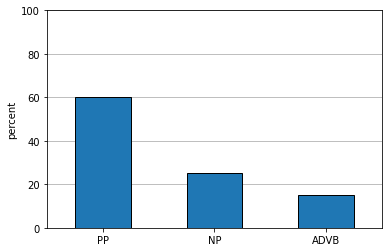

In [17]:
fig, ax = plt.subplots()
allf_pht_pr.mul(100).plot(kind='bar', edgecolor='black')
ax.set_ylabel('percent')
ax.set_ylim((0,100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
out.plot(
    'bar_allfptype_pc',
)

## Phrase Type Associations by Function

In [18]:
funcpt_ct = pivot_ct(
    df_main,
    'function',
    'ph_type',
)

funcpt_pr = funcpt_ct.div(funcpt_ct.sum(1),0)

out.table(
    funcpt_ct,
    'funcpt_ct',
    caption='Phrase Type Counts by Function'
)

ph_type,PP,NP,ADVB
function,,,
simultaneous,1196,293,458
atelic_ext,9,521,46
anterior_dur,434,0,0
posterior,191,0,34
posterior_dur,66,0,0
habitual,42,20,0
anterior,14,0,4
telic_ext,8,6,0
dist_fut,6,0,0


In [19]:
out.table(
    funcpt_pr.mul(100).round().astype(int).astype(str)+'%',
    'funcpt_pr',
    caption='Phrase Type Percentages by Function'
)

ph_type,PP,NP,ADVB
function,,,
simultaneous,61%,15%,24%
atelic_ext,2%,90%,8%
anterior_dur,100%,0%,0%
posterior,85%,0%,15%
posterior_dur,100%,0%,0%
habitual,68%,32%,0%
anterior,78%,0%,22%
telic_ext,57%,43%,0%
dist_fut,100%,0%,0%


In [20]:
funcpt_dp = sig.apply_deltaP(funcpt_ct, 0, 1)

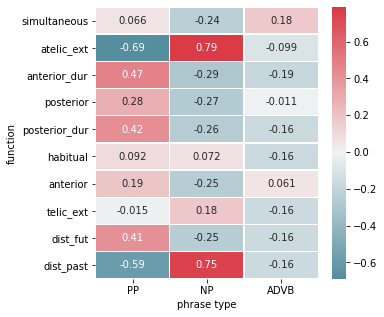

In [21]:
fig,ax = plt.subplots(figsize=(5,5))
heatmap(funcpt_dp, ax=ax, annot=True, square=False)
ax.set_xlabel('phrase type')

out.plot(
    'heat_funcphtype',
)

## Main Function Modifiers

In [22]:
afmod_ct = pivot_ct(
    df_main,
    'function',
    'modtag',
)

afmod_ct = afmod_ct.loc[:, afmod_ct.sum() > 10]

out.table(
    afmod_ct.iloc[:,:10],
    'afmod_ct',
    caption='Top Ten Modifier Counts by Function',
    adjustbox=True,
)

modtag,DEF,DEMON,C,NUM+PL,NUM,ORDN,PL+SFX,PL+C,PL+DEMON,KL+DEF
function,,,,,,,,,,
simultaneous,438,353,219,2,38,173,29,45,41,0
atelic_ext,2,0,6,162,117,0,0,2,1,55
anterior_dur,61,60,24,0,4,3,0,4,2,0
posterior,5,1,15,15,9,0,34,1,12,0
habitual,23,0,3,2,1,0,0,0,0,0
posterior_dur,3,3,0,0,1,1,5,10,0,0
telic_ext,0,0,0,2,10,0,0,0,0,0
anterior,1,0,0,0,0,0,5,0,1,0
dist_fut,0,0,0,5,1,0,0,0,0,0


In [23]:
afmod_pr = afmod_ct.div(afmod_ct.sum(1), 0)
afmod_pc = afmod_pr.mul(100).round().astype(int).astype(str)+'%'

out.table(
    afmod_pc.iloc[:,:10],
    'afmod_pc',
    caption='Modifier Percent of Function (Top Ten)',
    adjustbox=True
)

modtag,DEF,DEMON,C,NUM+PL,NUM,ORDN,PL+SFX,PL+C,PL+DEMON,KL+DEF
function,,,,,,,,,,
simultaneous,31%,25%,16%,0%,3%,12%,2%,3%,3%,0%
atelic_ext,0%,0%,1%,35%,25%,0%,0%,0%,0%,12%
anterior_dur,38%,38%,15%,0%,2%,2%,0%,2%,1%,0%
posterior,5%,1%,14%,14%,8%,0%,32%,1%,11%,0%
habitual,53%,0%,7%,5%,2%,0%,0%,0%,0%,0%
posterior_dur,12%,12%,0%,0%,4%,4%,21%,42%,0%,0%
telic_ext,0%,0%,0%,17%,83%,0%,0%,0%,0%,0%
anterior,9%,0%,0%,0%,0%,0%,45%,0%,9%,0%
dist_fut,0%,0%,0%,83%,17%,0%,0%,0%,0%,0%


In [24]:
afmod_dp = sig.apply_deltaP(afmod_ct, 0, 1)

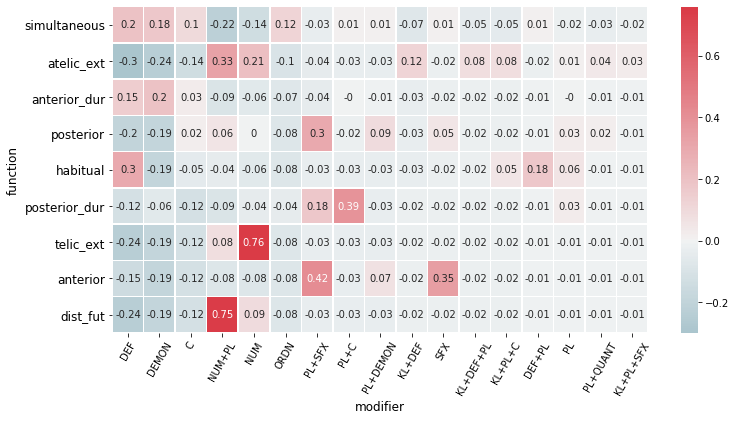

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
heatmap(afmod_dp.round(2), square=False, ax=ax, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
ax.set_ylabel('function', size=12)
ax.set_xlabel('modifier', size=12)

out.plot(
    'heat_afmod_dp',
)

# Export All Fronts

In [54]:
abbrevs = {
    'simultaneous': ['sim', 'Simultaneous'],
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'atelic_ext': ['atel', 'Atelic Extent'],
    'habitual': ['hab', 'Habitual'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'telic_ext': ['telic', 'Telic Extent'],
    'dist_fut': ['distfut', 'Distance Future'],  
    'dist_past': ['distpast', 'Distance Past'], 
}

funct2data = {}

for function, namedata in abbrevs.items():
    abbrev, full = namedata
    funct_df = df_main[df_main.function == function]
    front_cts = pd.DataFrame(
        funct_df['front'].value_counts()
    )
    front_cts = front_cts.rename_axis(index='front').set_axis(['count'], 1)
    front_prs = front_cts / front_cts.sum()
    front_cp = join_ct_pr(front_cts, front_prs)
    
    funct2data[function] = {
        'df': funct_df,
        'ct':front_cts,
        'pr':front_prs,
        'cp':front_cp,
    }
    
    print(function)
    display(
        out.table(
            front_cp,
            f'{abbrev}_front',
            caption=f'Attested {full} Forms in Sample',
            hebindex=True,
        )
    )

simultaneous


,count,percent
\texthebrew{ב},1081,56%
\texthebrew{עתה},349,18%
\texthebrew{Ø},293,15%
\texthebrew{אז},64,3%
\texthebrew{ל},42,2%
\texthebrew{כ},35,2%
\texthebrew{מחר},32,2%
\texthebrew{ב+אחרית},15,1%
\texthebrew{בין},7,0%
\texthebrew{ל+קץ},5,0%


anterior_dur


,count,percent
\texthebrew{עד},279,64%
\texthebrew{ל},152,35%
\texthebrew{עד+ל},3,1%


anterior


,count,percent
\texthebrew{ל+פנה},13,72%
\texthebrew{טרם},4,22%
\texthebrew{ל+פנה+מן},1,6%


atelic_ext


,count,percent
\texthebrew{Ø},521,90%
\texthebrew{תמיד},31,5%
\texthebrew{יומם},13,2%
\texthebrew{ל},5,1%
\texthebrew{את},2,0%
\texthebrew{כ},2,0%
\texthebrew{נצח},1,0%
\texthebrew{רביעי},1,0%


habitual


,count,percent
\texthebrew{ל},21,34%
\texthebrew{Ø},20,32%
\texthebrew{ב},17,27%
\texthebrew{מן},3,5%
\texthebrew{בין},1,2%


posterior


,count,percent
\texthebrew{אחר},161,72%
\texthebrew{מן},33,15%
\texthebrew{מן+קץ},18,8%
\texthebrew{מן+קצה},10,4%
\texthebrew{מן+אחר},2,1%
\texthebrew{מן+קצת},1,0%


posterior_dur


,count,percent
\texthebrew{מן},63,95%
\texthebrew{מן+ל},1,2%
\texthebrew{ל+מן},1,2%
\texthebrew{מן+תחלה},1,2%


telic_ext


,count,percent
\texthebrew{ב},8,57%
\texthebrew{Ø},6,43%


dist_fut


,count,percent
\texthebrew{ב},6,100%


dist_past


,count,percent
\texthebrew{Ø},3,100%


### Examples

#### Simul

In [27]:
simdf = funct2data['simultaneous']['df']

In [28]:
out.number(
    funct2data['simultaneous']['pr'].loc['ב'][0]*100,
    'perc_sim_B'
)

'56'

In [29]:
get = 'Ø'
out.number(
    funct2data['simultaneous']['pr'].loc[get][0]*100,
    'perc_sim_Ø'
)

'15'

In [30]:
nulldef_ct = simdf[simdf.front == 'Ø'].DEF.value_counts()
nulldef_pr = nulldef_ct / nulldef_ct.sum()

nulldef_pr

1.0    0.83959
0.0    0.16041
Name: DEF, dtype: float64

In [31]:
out.number(
    nulldef_pr[1]*100,
    'nulldef_pr'
)

'84'

#

In [32]:
null_nodef = simdf[
    (simdf.front == 'Ø')
    & (simdf.DEF == 0)
]

out.number(
    null_nodef.shape[0],
    'n_null_nodef'
)

ts.show(
    null_nodef
, extra=['function', 'times_utf8'], spread=10)

showing 10 of 47


,verse,clause,function,times_utf8
node,,,,
428652,Genesis 14:4,וּשְׁלֹשׁ־עֶשְׂרֵ֥ה שָׁנָ֖ה מָרָֽדוּ׃,simultaneous,שׁנה
442052,Numbers 11:9,בְרֶ֧דֶת הַטַּ֛ל עַל־הַֽמַּחֲנֶ֖ה לָ֑יְלָה,simultaneous,לילה
452297,Judges 9:32,ק֣וּם לַ֔יְלָה אַתָּ֖ה וְהָעָ֣ם,simultaneous,לילה
457391,1_Samuel 26:7,וַיָּבֹא֩ דָוִ֨ד וַאֲבִישַׁ֥י׀ אֶל־הָעָם֮ לַיְלָה֒,simultaneous,לילה
465833,2_Kings 7:12,וַיָּ֨קָם הַמֶּ֜לֶךְ לַ֗יְלָה,simultaneous,לילה
485724,Hosea 4:5,וְכָשַׁ֧ל גַּם־נָבִ֛יא עִמְּךָ֖ לָ֑יְלָה,simultaneous,לילה
490340,Psalms 5:4,בֹּ֖קֶר תִּשְׁמַ֣ע קֹולִ֑י,simultaneous,בקר
493512,Psalms 69:14,תְפִלָּתִֽי־לְךָ֨׀ עֵ֤ת רָצֹ֗ון,simultaneous,עת
499835,Job 34:25,וְהָ֥פַךְ לַ֝֗יְלָה,simultaneous,לילה


In [33]:
nndef_timects = null_nodef.times_utf8.value_counts()
nndef_timeprs = nndef_timects / nndef_timects.sum()

nndef_timects

לילה       31
יום         5
בקר         3
עת          2
רגע|יום     1
רגע         1
צהרים       1
מחר|עת      1
שׁנה        1
חדשׁ        1
Name: times_utf8, dtype: int64

In [34]:
out.number(
    nndef_timeprs['לילה']*100,
    'nndef_night_pr',
)

'66'

In [35]:
out.number(
    nndef_timects['לילה'],
    'nndef_night_ct',
)

'31'

In [36]:
out.number(
    nndef_timects['יום'],
    'nndef_day_ct',
)

'5'

In [37]:
out.number(
    nndef_timects['בקר'],
    'nndef_morning_ct',
)

'3'

### Phrase types

In [56]:
abbrevs = {
    'simultaneous': ['sim', 'Simultaneous'],
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'atelic_ext': ['atel', 'Atelic Extent'],
    'habitual': ['hab', 'Habitual'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'telic_ext': ['telic', 'Telic Extent'],    
    'dist_fut': ['distfut', 'Distance Future'],  
    'dist_past': ['distpast', 'Distance Past'],  
    'habitual': ['hab', 'Habitual'],
}

for function, namedata in abbrevs.items():
    abbrev, full = namedata
    phtype_cts = pd.DataFrame(
        df_main[df_main.function == function]['ph_type'].value_counts()
    )
    phtype_cts = phtype_cts.rename_axis(index='Phrase Type').set_axis(['count'], 1)
    phtype_prs = phtype_cts / phtype_cts.sum()
    phtype_cp = join_ct_pr(phtype_cts, phtype_prs)
    
    print(function)
    tablename = f'{abbrev}_phtype_ct'
    print(tablename)
    display(
        out.table(
            phtype_cp,
            tablename,
            caption=f'Attested {full} Phrase Types in Sample',
        )
    )
    print('-'*20)

simultaneous
sim_phtype_ct


,count,percent
Phrase Type,,
PP,1196,61%
ADVB,458,24%
NP,293,15%


--------------------
anterior_dur
antdur_phtype_ct


,count,percent
Phrase Type,,
PP,434,100%


--------------------
anterior
ant_phtype_ct


,count,percent
Phrase Type,,
PP,14,78%
ADVB,4,22%


--------------------
atelic_ext
atel_phtype_ct


,count,percent
Phrase Type,,
NP,521,90%
ADVB,46,8%
PP,9,2%


--------------------
habitual
hab_phtype_ct


,count,percent
Phrase Type,,
PP,42,68%
NP,20,32%


--------------------
posterior
post_phtype_ct


,count,percent
Phrase Type,,
PP,191,85%
ADVB,34,15%


--------------------
posterior_dur
postdur_phtype_ct


,count,percent
Phrase Type,,
PP,66,100%


--------------------
telic_ext
telic_phtype_ct


,count,percent
Phrase Type,,
PP,8,57%
NP,6,43%


--------------------
dist_fut
distfut_phtype_ct


,count,percent
Phrase Type,,
PP,6,100%


--------------------
dist_past
distpast_phtype_ct


,count,percent
Phrase Type,,
NP,3,100%


--------------------


## Examples for Simultaneous

In [39]:
simul_L = simdf[simdf.front == 'ל']

out.number(
    simul_L.shape[0],
    'n_simul_L'
)

'42'

In [40]:
ts.show(simul_L, extra=['front'])

showing 25 of 42


,verse,clause,front
node,,,
427805,Genesis 3:8,מִתְהַלֵּ֥ךְ בַּגָּ֖ן לְר֣וּחַ הַיֹּ֑ום,ל
428223,Genesis 8:11,וַתָּבֹ֨א אֵלָ֤יו הַיֹּונָה֙ לְעֵ֣ת עֶ֔רֶב,ל
429008,Genesis 18:14,לַמֹּועֵ֞ד אָשׁ֥וּב אֵלֶ֛יךָ כָּעֵ֥ת חַיָּ֖ה,ל
430522,Genesis 28:19,וְאוּלָ֛ם ל֥וּז שֵׁם־הָעִ֖יר לָרִאשֹׁנָֽה׃,ל
433410,Genesis 49:27,וְלָעֶ֖רֶב יְחַלֵּ֥ק שָׁלָֽל׃,ל
434331,Exodus 8:6,לְמָחָ֑ר,ל
437249,Exodus 34:18,אֲשֶׁ֣ר צִוִּיתִ֔ךָ לְמֹועֵ֖ד חֹ֣דֶשׁ הָאָבִ֑יב,ל
458967,2_Samuel 11:2,וַיְהִ֣י׀ לְעֵ֣ת הָעֶ֗רֶב,ל
463418,1_Kings 15:23,רַ֚ק לְעֵ֣ת זִקְנָתֹ֔ו חָלָ֖ה אֶת־רַגְלָֽיו׃,ל


In [41]:
siml_head_ct = simul_L.head_utf8.value_counts()
siml_head_pr = siml_head_ct / siml_head_ct.sum()
siml_head_cp = join_ct_pr(siml_head_ct, siml_head_pr)

out.table(
    siml_head_cp,
    'siml_head_cp', 
    caption='Semantic Heads of Simultaneous \texthebrew{לְ} Adverbials',
)

,count,percent
עת,10,24%
יום,8,19%
מועד,7,17%
ערב,3,7%
תשׁובה,3,7%
מחר,3,7%
מחרת,2,5%
בקר,1,2%
רוח,1,2%
תקופה,1,2%


In [42]:
ts.show(
    simul_L[simul_L.head_utf8 == 'יום']
)

showing 8 of 8


,verse,clause
node,,
428156,Genesis 7:10,וַֽיְהִ֖י לְשִׁבְעַ֣ת הַיָּמִ֑ים
468896,Isaiah 10:3,וּמַֽה־תַּעֲשׂוּ֙ לְיֹ֣ום פְּקֻדָּ֔ה
486026,Hosea 9:5,מַֽה־תַּעֲשׂ֖וּ לְיֹ֣ום מֹועֵ֑ד
486027,Hosea 9:5,וּלְיֹ֖ום חַג־יְהוָֽה׃
490180,Malachi 3:17,וְהָ֣יוּ לִ֗י לַיֹּ֕ום סְגֻלָּ֑ה
498980,Job 21:30,כִּ֤י לְיֹ֣ום אֵ֭יד יֵחָ֣שֶׂךְ רָ֑ע
498981,Job 21:30,לְיֹ֖ום עֲבָרֹ֣ות יוּבָֽלוּ׃
500932,Proverbs 7:20,לְיֹ֥ום הַ֝כֵּ֗סֶא יָבֹ֥א בֵיתֹֽו׃


**<L**

In [43]:
ts.show(
    simdf[simdf.front == 'על']
)

showing 2 of 2


,verse,clause
node,,
457163,1_Samuel 25:8,כִּֽי־עַל־יֹ֥ום טֹ֖וב בָּ֑נוּ
509657,Nehemiah 12:22,וְהַכֹּ֣הֲנִ֔ים עַל־מַלְכ֖וּת דָּרְיָ֥וֶשׁ הַפָּֽרְסִֽי׃ פ


In [44]:
ts.show(
    simdf[simdf.front == 'אל']
)

showing 1 of 1


,verse,clause
node,,
460937,2_Samuel 23:13,וַיָּבֹ֤אוּ אֶל־קָצִיר֙ אֶל־דָּוִ֔ד אֶל־מְעָרַ֖ת עֲדֻלָּ֑ם


In [45]:
ts.show(
    simdf[simdf.front == 'רגע']
)

showing 1 of 1


,verse,clause
node,,
472789,Isaiah 54:8,בְּשֶׁ֣צֶף קֶ֗צֶף הִסְתַּ֨רְתִּי פָנַ֥י רֶ֨גַע֙ מִמֵּ֔ךְ


In [46]:
assorted = [
    'יומם',
    'אחרון',
    'ראשׁ', 
    'חצות',
]

ts.show(
    simdf[simdf.front.isin(assorted)]
)

showing 9 of 9


,verse,clause
node,,
451807,Judges 6:27,מֵעֲשֹׂ֥ות יֹומָ֖ם
451986,Judges 7:19,וַיָּבֹ֣א גִ֠דְעֹון וּמֵאָה־אִ֨ישׁ בִּקְצֵ֣ה הַֽמַּחֲנֶ֗ה רֹ֚אשׁ הָאַשְׁמֹ֣רֶת הַתִּֽיכֹונָ֔ה
481047,Ezekiel 12:7,כֵּ֠לַי הֹוצֵ֜אתִי כִּכְלֵ֤י גֹולָה֙ יֹומָ֔ם
491083,Psalms 22:3,אֶקְרָ֣א יֹ֖ומָם
494828,Psalms 91:5,יָע֥וּף יֹומָֽם׃
496291,Psalms 119:62,חֲצֹֽות־לַ֗יְלָה אָ֭קוּם
496593,Psalms 121:6,יֹומָ֗ם הַשֶּׁ֥מֶשׁ לֹֽא־יַכֶּ֗כָּה
498816,Job 19:25,וְ֝אַחֲרֹ֗ון עַל־עָפָ֥ר יָקֽוּם׃
499821,Job 34:20,וַחֲצֹ֪ות לָ֥יְלָה יְגֹעֲשׁ֣וּ עָ֣ם


# Text Examples

## Automatic Examples

In [49]:
seqs = {
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
}

for function, namedata in seqs.items():
    abbrev, full = namedata
    fronts = funct2data[function]['ct'].index
    print(function)
    for front in fronts:
        print(front)
        exdf = df_main[
            (df_main.function == function)
            & (df_main.front == front)
        ]
        display(
            ts.show(exdf, spread=5, extra=['function', 'front'])
        )
    print('-'*50)

anterior_dur
עד
showing 5 of 279


,verse,clause,function,front
node,,,,
428203,Genesis 8:5,וְהַמַּ֗יִם הָיוּ֙ הָלֹ֣וךְ וְחָסֹ֔ור עַ֖ד הַחֹ֣דֶשׁ הָֽעֲשִׂירִ֑י,anterior_dur,עד
443072,Numbers 19:21,וְיִטְמָ֖א עַד־הָעָֽרֶב׃,anterior_dur,עד
457527,1_Samuel 27:6,לָכֵ֞ן הָיְתָ֤ה צִֽקְלַג֙ לְמַלְכֵ֣י יְהוּדָ֔ה עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ,anterior_dur,עד
490677,Psalms 13:3,עַד־אָ֨נָה אָשִׁ֪ית עֵצֹ֡ות בְּנַפְשִׁ֗י,anterior_dur,עד
515582,2_Chronicles 35:25,וַיֹּאמְר֣וּ כָֽל־הַשָּׁרִ֣ים׀ וְ֠הַשָּׁרֹות בְּקִינֹ֨ותֵיהֶ֤ם עַל־יֹאשִׁיָּ֨הוּ֙ עַד־הַיֹּ֔ום,anterior_dur,עד


ל
showing 5 of 152


,verse,clause,function,front
node,,,,
427870,Genesis 3:22,וָחַ֥י לְעֹלָֽם׃,anterior_dur,ל
479597,Jeremiah 50:39,וְלֹֽא־תֵשֵׁ֥ב עֹוד֙ לָנֶ֔צַח,anterior_dur,ל
492307,Psalms 44:9,וְשִׁמְךָ֓׀ לְעֹולָ֖ם נֹודֶ֣ה,anterior_dur,ל
495917,Psalms 112:6,כִּֽי־לְעֹולָ֥ם לֹא־יִמֹּ֑וט,anterior_dur,ל
515267,2_Chronicles 33:7,בַּבַּ֨יִת הַזֶּ֜ה וּבִֽירוּשָׁלִַ֗ם אָשִׂ֥ים אֶת־שְׁמִ֖י לְעֵילֹֽום׃,anterior_dur,ל


עד+ל
showing 3 of 3


,verse,clause,function,front
node,,,,
508373,Ezra 9:4,וַאֲנִי֙ יֹשֵׁ֣ב מְשֹׁומֵ֔ם עַ֖ד לְמִנְחַ֥ת הָעָֽרֶב׃,anterior_dur,עד+ל
511836,1_Chronicles 23:25,וַיִּשְׁכֹּ֥ן בִּירוּשָׁלִַ֖ם עַד־לְעֹולָֽם׃,anterior_dur,עד+ל
512186,1_Chronicles 28:7,וַהֲכִינֹותִ֥י אֶת־מַלְכוּתֹ֖ו עַד־לְעֹולָ֑ם,anterior_dur,עד+ל


--------------------------------------------------
anterior
ל+פנה
showing 5 of 13


,verse,clause,function,front
node,,,,
430247,Genesis 27:7,וַאֲבָרֶכְכָ֛ה לִפְנֵ֥י יְהוָ֖ה לִפְנֵ֥י מֹותִֽי׃,anterior,ל+פנה
433499,Genesis 50:16,אָבִ֣יךָ צִוָּ֔ה לִפְנֵ֥י מֹותֹ֖ו,anterior,ל+פנה
467924,2_Kings 23:25,וְכָמֹהוּ֩ לֹֽא־הָיָ֨ה לְפָנָ֜יו מֶ֗לֶךְ,anterior,ל+פנה
498056,Job 8:16,רָטֹ֣ב ה֖וּא לִפְנֵי־שָׁ֑מֶשׁ,anterior,ל+פנה
511707,1_Chronicles 22:5,וַיָּ֧כֶן דָּוִ֛יד לָרֹ֖ב לִפְנֵ֥י מֹותֹֽו׃,anterior,ל+פנה


טרם
showing 4 of 4


,verse,clause,function,front
node,,,,
427693,Genesis 2:5,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָאָ֔רֶץ,anterior,טרם
427694,Genesis 2:5,וְכָל־עֵ֥שֶׂב הַשָּׂדֶ֖ה טֶ֣רֶם יִצְמָ֑ח,anterior,טרם
434600,Exodus 10:7,הֲטֶ֣רֶם תֵּדַ֔ע,anterior,טרם
448860,Joshua 2:8,טֶ֣רֶם יִשְׁכָּב֑וּן,anterior,טרם


ל+פנה+מן
showing 1 of 1


,verse,clause,function,front
node,,,,
509727,Nehemiah 13:4,וְלִפְנֵ֣י מִזֶּ֔ה אֶלְיָשִׁיב֙ הַכֹּהֵ֔ן,anterior,ל+פנה+מן


--------------------------------------------------
posterior
אחר
showing 5 of 161


,verse,clause,function,front
node,,,,
428070,Genesis 6:4,וְגַ֣ם אַֽחֲרֵי־כֵ֗ן,posterior,אחר
440180,Leviticus 22:7,וְאַחַר֙ יֹאכַ֣ל מִן־הַקֳּדָשִׁ֔ים,posterior,אחר
457117,1_Samuel 24:22,אִם־תַּכְרִ֥ית אֶת־זַרְעִ֖י אַֽחֲרָ֑י,posterior,אחר
502997,Ruth 2:11,אֲשֶׁר־עָשִׂית֙ אֶת־חֲמֹותֵ֔ךְ אַחֲרֵ֖י מֹ֣ות אִישֵׁ֑ךְ,posterior,אחר
515548,2_Chronicles 35:20,אַחֲרֵ֣י כָל־זֹ֗את עָלָ֞ה נְכֹ֧ו מֶֽלֶךְ־מִצְרַ֛יִם,posterior,אחר


מן
showing 5 of 33


,verse,clause,function,front
node,,,,
429260,Genesis 19:34,וַֽיְהִי֙ מִֽמָּחֳרָ֔ת,posterior,מן
442804,Numbers 17:6,וַיִּלֹּ֜נוּ כָּל־עֲדַ֤ת בְּנֵֽי־יִשְׂרָאֵל֙ מִֽמָּחֳרָ֔ת עַל־מֹשֶׁ֥ה וְעַֽל־אַהֲרֹ֖ן,posterior,מן
453845,Judges 21:4,וַֽיְהִי֙ מִֽמָּחֳרָ֔ת,posterior,מן
474107,Jeremiah 3:4,הֲלֹ֣וא מֵעַ֔תָּה קָרָ֥את לִ֖י,posterior,מן
514549,2_Chronicles 25:27,וּמֵעֵ֗ת,posterior,מן


מן+קץ
showing 5 of 18


,verse,clause,function,front
node,,,,
427887,Genesis 4:3,וַֽיְהִ֖י מִקֵּ֣ץ יָמִ֑ים,posterior,מן+קץ
445968,Deuteronomy 9:11,מִקֵּץ֙ אַרְבָּעִ֣ים יֹ֔ום וְאַרְבָּעִ֖ים לָ֑יְלָה נָתַ֨ן יְהוָ֜ה אֵלַ֗י אֶת־שְׁנֵ֛י לֻחֹ֥ת הָאֲבָנִ֖ים לֻחֹ֥ות הַבְּרִֽית׃,posterior,מן+קץ
459695,2_Samuel 15:7,וַיְהִ֕י מִקֵּ֖ץ אַרְבָּעִ֣ים שָׁנָ֑ה,posterior,מן+קץ
469819,Isaiah 23:17,וְהָיָ֞ה מִקֵּ֣ץ׀ שִׁבְעִ֣ים שָׁנָ֗ה,posterior,מן+קץ
512988,2_Chronicles 8:1,וַיְהִ֞י מִקֵּ֣ץ׀ עֶשְׂרִ֣ים שָׁנָ֗ה,posterior,מן+קץ


מן+קצה
showing 5 of 10


,verse,clause,function,front
node,,,,
428201,Genesis 8:3,וַיַּחְסְר֣וּ הַמַּ֔יִם מִקְצֵ֕ה חֲמִשִּׁ֥ים וּמְאַ֖ת יֹֽום׃,posterior,מן+קצה
449658,Joshua 9:16,וַיְהִ֗י מִקְצֵה֙ שְׁלֹ֣שֶׁת יָמִ֔ים,posterior,מן+קצה
462527,1_Kings 9:10,וַיְהִ֗י מִקְצֵה֙ עֶשְׂרִ֣ים שָׁנָ֔ה,posterior,מן+קצה
467220,2_Kings 18:10,וַֽיִּלְכְּדֻ֗הָ מִקְצֵה֙ שָׁלֹ֣שׁ שָׁנִ֔ים,posterior,מן+קצה
484490,Ezekiel 39:14,מִקְצֵ֥ה שִׁבְעָֽה־חֳדָשִׁ֖ים יַחְקֹֽרוּ׃,posterior,מן+קצה


מן+אחר
showing 2 of 2


,verse,clause,function,front
node,,,,
458335,2_Samuel 3:28,וַיִּשְׁמַ֤ע דָּוִד֙ מֵאַ֣חֲרֵי כֵ֔ן,posterior,מן+אחר
459663,2_Samuel 15:1,וַֽיְהִי֙ מֵאַ֣חֲרֵי כֵ֔ן,posterior,מן+אחר


מן+קצת
showing 1 of 1


,verse,clause,function,front
node,,,,
506047,Daniel 1:15,וּמִקְצָת֙ יָמִ֣ים עֲשָׂרָ֔ה נִרְאָ֤ה מַרְאֵיהֶם֙,posterior,מן+קצת


--------------------------------------------------
posterior_dur
מן
showing 5 of 63


,verse,clause,function,front
node,,,,
435870,Exodus 21:29,וְאִ֡ם שֹׁור֩ נַגָּ֨ח ה֜וּא מִתְּמֹ֣ל שִׁלְשֹׁ֗ם,posterior_dur,מן
471018,Isaiah 37:26,אֹותָ֣הּ עָשִׂ֔יתִי מִ֥ימֵי קֶ֖דֶם,posterior_dur,מן
472202,Isaiah 48:3,הָרִֽאשֹׁנֹות֙ מֵאָ֣ז הִגַּ֔דְתִּי,posterior_dur,מן
486120,Hosea 10:9,מִימֵי֙ הַגִּבְעָ֔ה חָטָ֖אתָ,posterior_dur,מן
515543,2_Chronicles 35:18,וְלֹֽא־נַעֲשָׂ֨ה פֶ֤סַח כָּמֹ֨הוּ֙ בְּיִשְׂרָאֵ֔ל מִימֵ֖י שְׁמוּאֵ֣ל הַנָּבִ֑יא,posterior_dur,מן


מן+ל
showing 1 of 1


,verse,clause,function,front
node,,,,
471467,Isaiah 41:26,וּמִלְּפָנִ֖ים,posterior_dur,מן+ל


ל+מן
showing 1 of 1


,verse,clause,function,front
node,,,,
490132,Malachi 3:7,לְמִימֵ֨י אֲבֹתֵיכֶ֜ם סַרְתֶּ֤ם מֵֽחֻקַּי֙,posterior_dur,ל+מן


מן+תחלה
showing 1 of 1


,verse,clause,function,front
node,,,,
460695,2_Samuel 21:10,וַתַּטֵּ֨הוּ לָ֤הּ אֶל־הַצּוּר֙ מִתְּחִלַּ֣ת קָצִ֔יר,posterior_dur,מן+תחלה


--------------------------------------------------
